<a href="https://colab.research.google.com/github/Glazerrr/TEst/blob/main/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
n <- 10000
m <- 100

In [ ]:
# по какому распределению поступает/по какому распределению обслуживается/количество обслуживающих устройств
# 𝐸𝜏 - среднее время между приходами
# 𝐸𝑆 - среднее время обслуживания
# М пуассоновское распределение (экспон)
M <- matrix(nrow = m, ncol = n) 
lamb <- 9
mu <- 12
Et <- 1/lamb
Es <- 1/mu
# ро - критерий стационарности
# если он меньше единицы - то очередь не растет бесконечно, то есть 
# здесь он меньше единицы, значит очередь не будет постоянно расти
p = Es/Et

In [ ]:
for (i in 1:m){
    in_ <- rexp(n, rate = lamb) # 𝜏n поступающих заявок
    service_t <- rexp(n, rate = mu) # Sn
    load_ <- 0
    for (j in 1:n){
        load_ <- max(0, load_ + service_t[j] - in_[j]) # рекурсия линдли (следующий элемент находится как максимум между 0 и самой рекурсией)
        M[i, j] <- load_
    }
}



In [ ]:
srd = matrix(1:n, nrow = 1)
for(i in 1:n){
  srd[i] = mean(M[,i])
}
srd # МО каждого столбца 

0.03907453,0.06699257,0.08067915,0.09837814,0.1068236,0.1237937,0.1202202,0.1197861,0.1217727,0.1344258,⋯,0.2192142,0.2380402,0.2433527,0.2304863,0.2389996,0.2282565,0.2474542,0.2494719,0.252851,0.2626987


Формула Поллачека-Хинчина

In [ ]:
#EW = (lamb*mu) / (2*(mu - 2)*( 1 - (mu*lamb)/(mu - 1) ))
#EW
EW = (lamb*Es*Es)/(2*(1-p)) # грубо говоря МО
EW

[1] 0.125

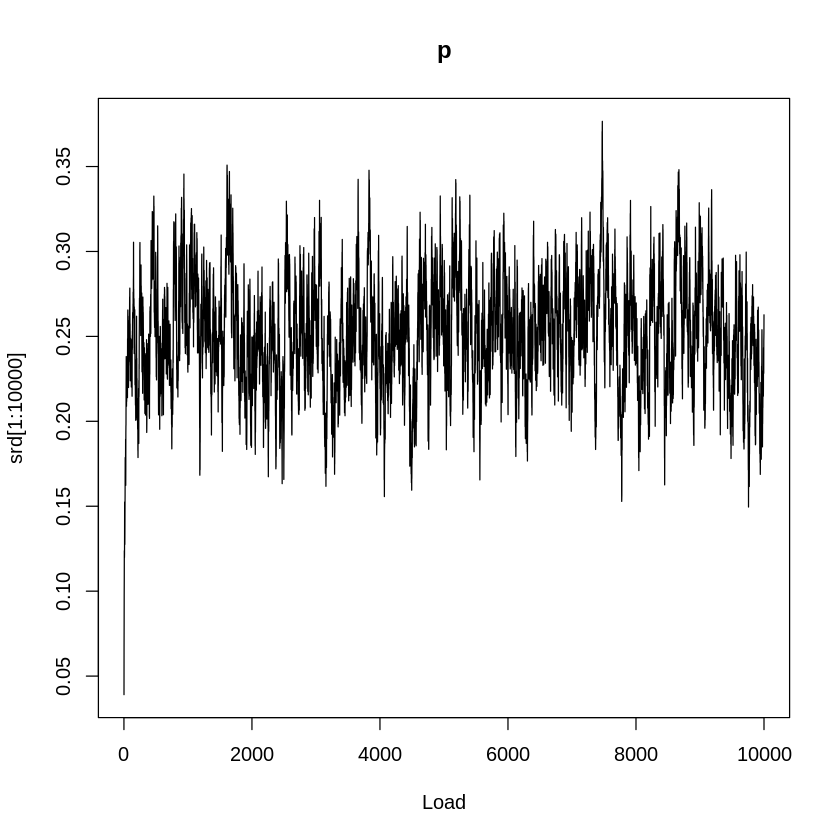

In [ ]:
plot(srd[1:10000], type = "l", main = 'p', xlab = 'Load') # очередь не растет бесконечно
#abline(b = 0, a = EW, col = "red")

### $M/M/1$ for $E \tau < {E}S$

In [ ]:
lamb <- 13
myu <- 11
Et <- 1/lamb
Es <- 1/mu
p <- Es/Et

In [ ]:
for(i in 1:100){
  in_ = rexp(10000, lamb)
  service_t = rexp(10000, mu)
  load_ = 0
  for(j in 1:10000){
    load_ = max(0, load_ + service_t[j] - in_[j])
    M[i, j] = load_
  }
}

srd = matrix(1:10000, nrow = 1)
for(i in 1:10000){
  srd[i] = mean(M[1:100,i])
}
srd

0.03891485,0.0785826,0.08883917,0.1154043,0.1500076,0.1735335,0.207603,0.2148185,0.2480067,0.2785858,⋯,61.35361,61.35181,61.34948,61.37046,61.39664,61.39562,61.37688,61.38822,61.40675,61.41245


[1] -0.5416667

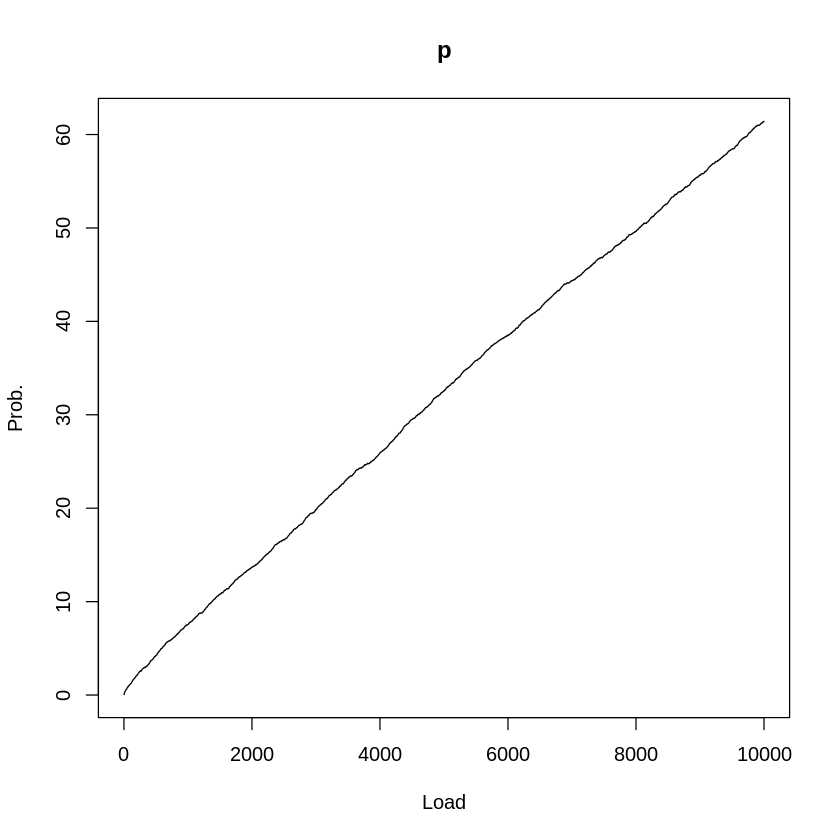

In [ ]:
#EW = (lamb*mu) / (2*(mu - 2)*( 1 - (mu*lamb)/(mu - 1) ))
EW = (lamb*Es*Es)/(2*(1-p))
EW

plot(srd[1:10000], type = "l", main = 'p', xlab = 'Load', ylab = 'Prob.') # очередь растет бесконечно

### $M/ParEto/1$ for $E \tau > {E}S$

In [ ]:
lamb <- 0.7
mu <- 5
Et <- 1/lamb
Es <- myu/(myu-1)
p <- Es/Et
for(i in 1:100){
  in_ <- rexp(10000, lamb)
  service_t <- sapply(runif(10000), function(x) (1-x)^(-1/(myu))) # распределение парето
  load_ <- 0
  for(j in 1:10000){
    load_ <- max(0, load_ + service_t[j] - in_[j])
    M[i, j] <- load_
  }
}

srd = matrix(1:10000, nrow = 1)
for(i in 1:10000){
  srd[i] = mean(M[1:100,i])
}
srd

0.3308387,0.5543974,0.6852482,0.8909676,1.156532,1.273389,1.280045,1.354949,1.330333,1.455764,⋯,2.075347,2.069534,2.09053,2.023353,2.124485,2.19762,2.11553,2.159153,2.243854,2.251492


Формула Поллачека-Хинчина

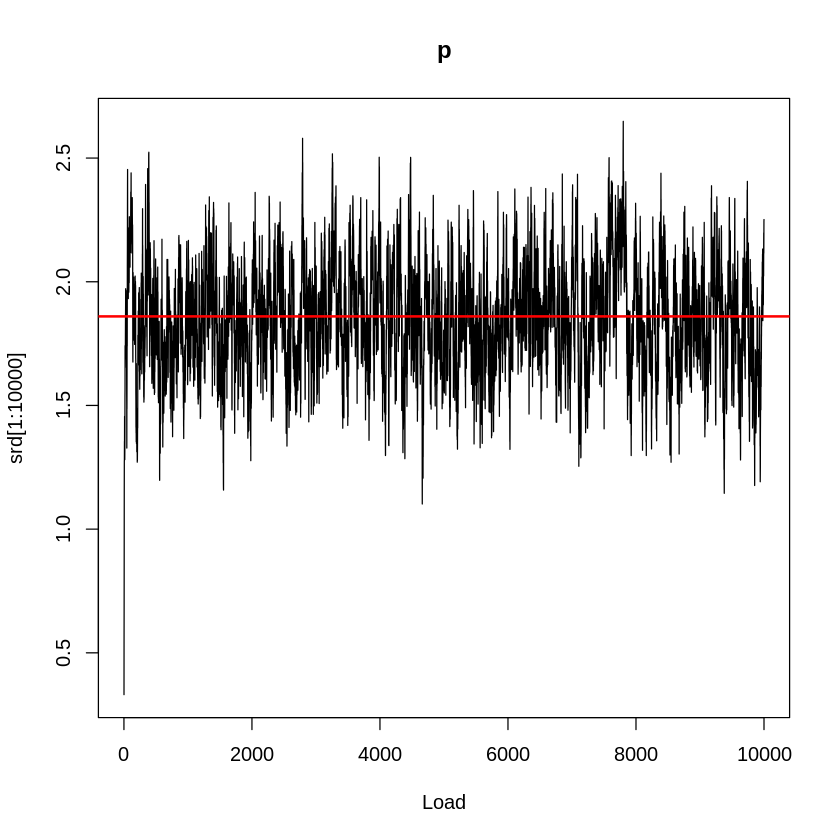

In [ ]:
EW = (lamb*myu) / (2*(myu - 2)*( 1 - (myu*lamb)/(myu - 1) ))

plot(srd[1:10000], type = "l", main = 'p', xlab = 'Load')
abline(b = 0, a = EW, col = "red", lwd = 2)

### $M/\text{ParEto}/1$ for $E \tau < ES$

In [ ]:
lamb <- 1.5
mu <- 1.1
Et <- 1/lamb
Es <- myu/(myu-1)
p <- Es/Et
for(i in 1:100){
  in_ <- rexp(10000, lamb)
  service_t <- sapply(runif(10000), function(x) (1-x)^(-1/(myu)))
  load_ <- 0
  for(j in 1:10000){
    load_ <- max(0, load_ + service_t[j] - in_[j])
    M[i, j] <- load_
  }
}

srd = matrix(1:10000, nrow = 1)
for(i in 1:10000){
  srd[i] = mean(M[1:100,i])
}
srd

0.5970369,1.186018,1.640431,2.075563,2.572755,3.005558,3.549463,3.968576,4.438575,4.854143,⋯,4318.332,4318.779,4319.258,4319.699,4320.021,4320.49,4320.937,4321.35,4321.814,4322.168


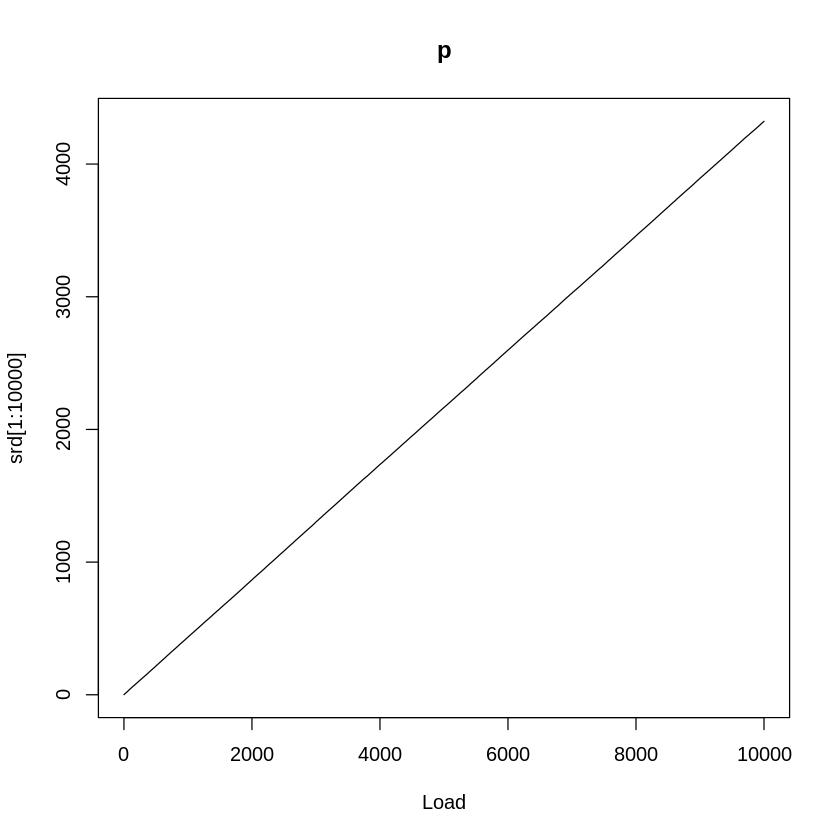

In [ ]:
plot(srd[1:10000], type = "l", main = 'p', xlab = 'Load')

### ParEto/$M/1$ for $E \tau > ES$

In [ ]:
lamb <- 1.1
mu <- 1.9
Et <- lamb/(lamb-1)
Es <- 1/mu
p <- Es/Et
for(i in 1:100){
  in_ <- sapply(runif(10000), function(x) (1-x)^(-1/(lamb)))
  service_t <- rexp(10000, mu)
  load_ <- 0
  for(j in 1:10000){
    load_ <- max(0, load_ + service_t[j] - in_[j])
    M[i, j] <- load_
  }
}

srd = matrix(1:10000, nrow = 1)

for(i in 1:10000){
  srd[i] = mean(M[1:100,i])
}
srd

0.03484512,0.004210043,0.04346399,0.03744825,0.002015999,0.02812785,0.01630793,0.02881455,0.02688571,0.03202656,⋯,0.01141229,0.008426792,0.03188026,0.01526863,0.02091761,0.01664327,0.010861,0.0174425,0.03560891,0.04742728


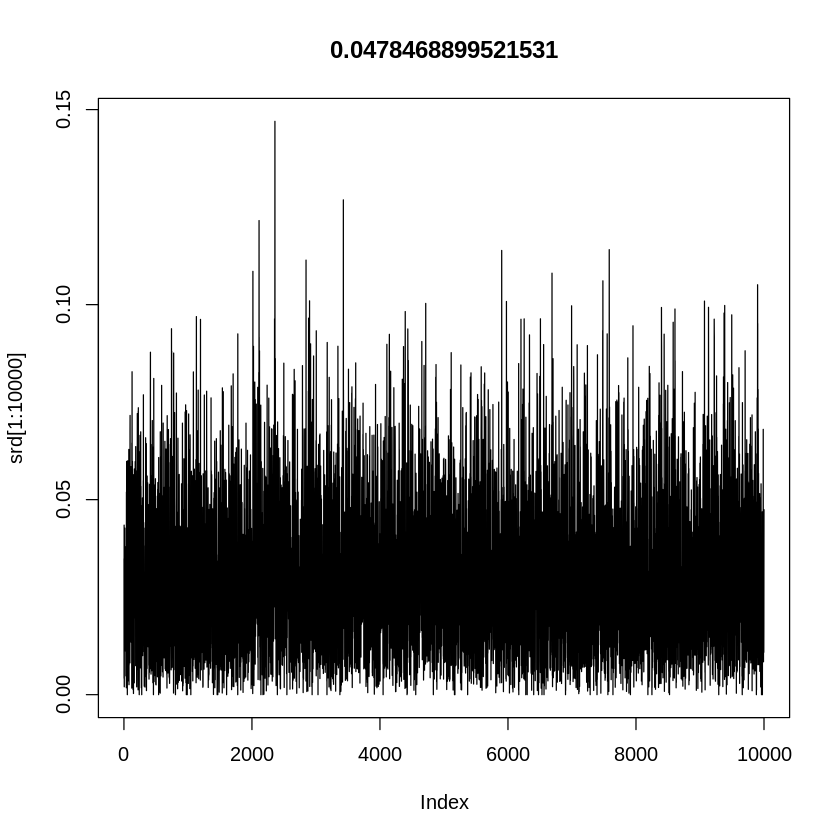

In [ ]:
plot(srd[1:10000], type = "l", main = p)

### ParEto/$M/1$ for $E \tau < ES$

In [ ]:
lamb <- 5
mu <- 0.7
Et <- lamb/(lamb-1)
Es <- 1/mu
p <- Es/Et
for(i in 1:100){
  in_ = sapply(runif(10000), function(x) (1-x)^(-1/(lamb)))
  service_t <- rexp(10000, mu)
  load_ <- 0
  for(j in 1:10000){
    load_ = max(0, load_ + service_t[j] - in_[j])
    M[i, j] = load_
  }
}

srd = matrix(1:10000, nrow = 1)

for(i in 1:10000){
  srd[i] = mean(M[1:100,i])
}
srd

0.643763,1.269496,1.532794,1.990165,2.097429,2.486054,2.91023,3.148903,3.699712,4.007483,⋯,1782.332,1782.537,1783.038,1783.238,1783.671,1783.708,1784.022,1784.602,1784.847,1785.299


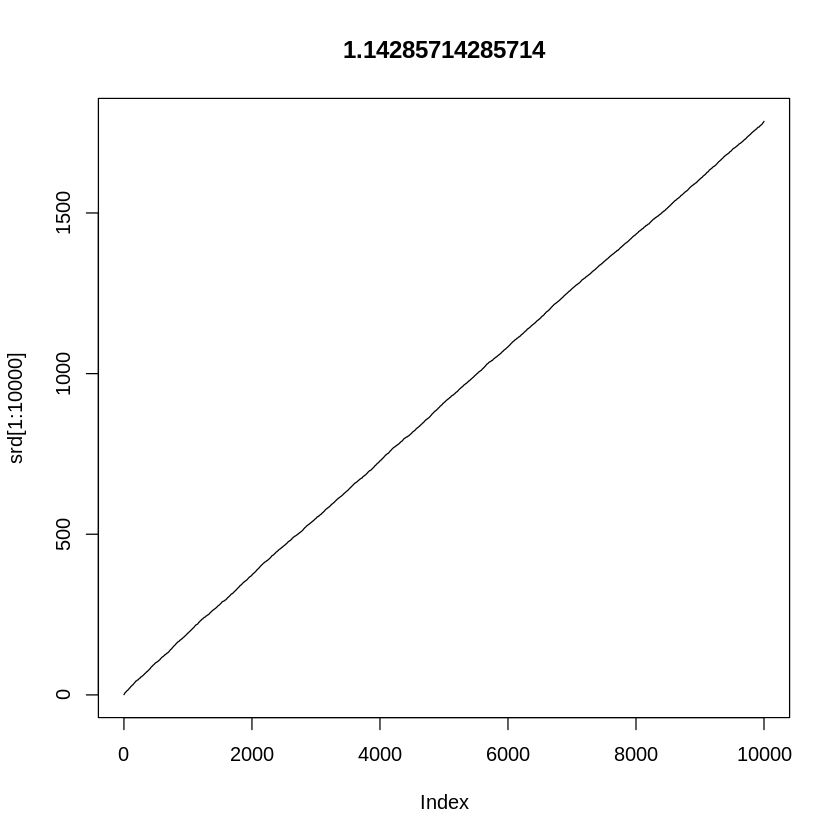

In [ ]:
plot(srd[1:10000], type = "l", main = p)

### $\text{ParEto}/\text{ParEto}/1$ for $E \tau > ES$

In [ ]:
lamb <- 4
mu <- 6
Et <- lamb/(lamb-1)
Es <- mu/(mu-1)
p <- Es/Et
for(i in 1:100){
  in_ <- sapply(runif(10000), function(x) (1-x)^(-1/(lamb)))
  service_t <- sapply(runif(10000), function(x) (1-x)^(-1/(mu)))
  load_ <- 0
  for(j in 1:10000){
    load_ <- max(0, load_ + service_t[j] - in_[j])
    M[i, j] <- load_
  }
}

srd = matrix(1:10000, nrow = 1)

for(i in 1:10000){
  srd[i] = mean(M[1:100,i])
}
srd

0.08761331,0.1411032,0.1810369,0.261924,0.3529897,0.3977489,0.4104816,0.3902987,0.361472,0.391054,⋯,0.5878045,0.5696277,0.5371539,0.5436957,0.4977854,0.4757014,0.4577337,0.4306946,0.4087179,0.4473458


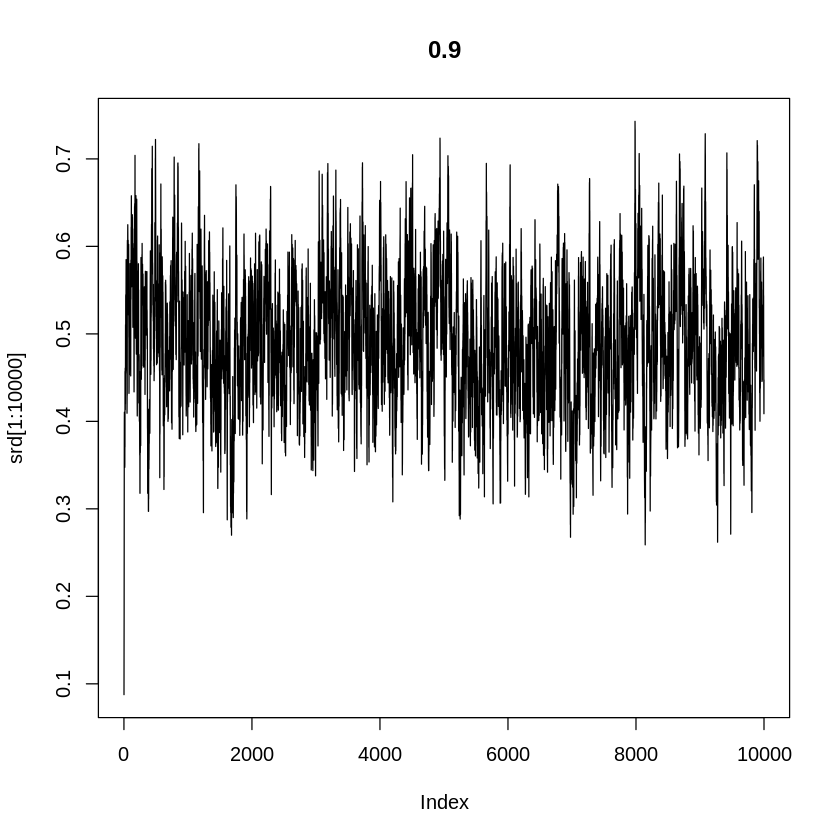

In [ ]:
plot(srd[1:10000], type = "l", main = p)

### $\text{ParEto}/\text{ParEto}/1$ for $E \tau < ES$

In [ ]:
lamb <- 6
mu <- 4
Et <- lamb/(lamb-1)
Es <- mu/(mu-1)
p <- Es/Et
for(i in 1:100){
  in_ <- sapply(runif(10000), function(x) (1-x)^(-1/(lamb)))
  service_t <- sapply(runif(10000), function(x) (1-x)^(-1/(mu)))
  load_ <- 0
  for(j in 1:10000){
    load_ <- max(0, load_ + service_t[j] - in_[j])
    M[i, j] <- load_
  }
}

srd = matrix(1:10000, nrow = 1)

for(i in 1:10000){
  srd[i] = mean(M[1:100,i])
}
srd

0.2053103,0.3866719,0.5802025,0.686302,0.8412162,0.9232113,1.185715,1.3814,1.543666,1.649358,⋯,1336.21,1336.275,1336.379,1336.676,1336.787,1336.924,1337.04,1337.259,1337.315,1337.443


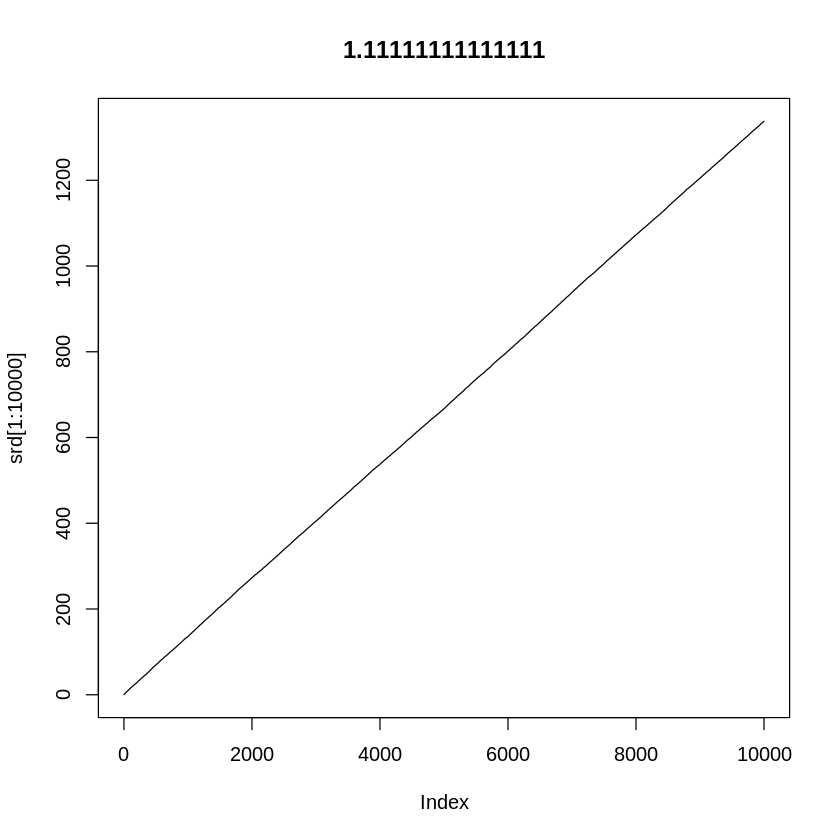

In [ ]:
plot(srd[1:10000], type = "l", main = p)